In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import mplfinance as mpf
%matplotlib inline

### Lendo os arquivos.

In [61]:
### Vendas AMD
path_AMD = "../2 - Arquivo Tratado/AMD.csv"
videos_AMD = pd.read_csv(path_AMD)
videos_AMD_std = videos_AMD.copy()

### Vendas Intel
path_Intel = "../2 - Arquivo Tratado/Intel.csv"
videos_Intel = pd.read_csv(path_Intel)
videos_Intel_std = videos_Intel.copy()

### Vendas Nvidia
path_Nvidia = "../2 - Arquivo Tratado/Nvidia.csv"
videos_Nvidia = pd.read_csv(path_Nvidia)
videos_Nvidia_std = videos_Nvidia.copy()

### Vizualização inicial.

In [ ]:
print(' DF AMD','\n',videos_AMD.head(),'\n',
      'DF Intel','\n',videos_Intel.head(),'\n',
      'DF Nvidia','\n',videos_Nvidia.tail())

### Agrupando os dados por semana.

In [62]:
### Soma das vendas por semana AMD
videos_AMD_std['date'] = videos_AMD_std['date'].apply(lambda x: pd.Timestamp(x).year)
videos_AMD_vol_sum = videos_AMD_std.groupby('date').volume.sum()

### Soma das vendas por semana Intel
videos_Intel_std['date'] = videos_Intel_std['date'].apply(lambda x: pd.Timestamp(x).year)
videos_Intel_vol_sum = videos_Intel_std.groupby('date').volume.sum()

### Soma das vendas por semana Nvidia
videos_Nvidia_std['date'] = videos_Nvidia_std['date'].apply(lambda x: pd.Timestamp(x).year)
videos_Nvidia_vol_sum = videos_Nvidia_std.groupby('date').volume.sum()

### Resultado dos agrupamentos

In [ ]:
print(' DF AMD','\n',videos_AMD_std.head(),'\n',
      'DF Intel','\n',videos_Intel_std.head(),'\n',
      'DF Nvidia','\n',videos_Nvidia_std.head())

### Início da análise dos dados.

In [63]:
### Criando um DF das somas dos volumes de venda.

df_volume = pd.DataFrame([videos_AMD_vol_sum, videos_Intel_vol_sum, videos_Nvidia_vol_sum])
df_volume = df_volume.transpose()
df_volume.columns = ['Volume_AMD','Volume_Intel','Volume_Nvidia']
df_volume = df_volume.sort_values(by='date')
df_volume.head()

,Volume_AMD,Volume_Intel,Volume_Nvidia
date,,,
1980,NaN,2.277254e+09,NaN
1981,NaN,2.925283e+09,NaN
1982,NaN,6.411293e+09,NaN
1983,113680300.0,6.386964e+09,NaN
1984,233580400.0,7.015439e+09,NaN


In [ ]:
"""

plt.xlim( [ 0, 80 ] )          # Plot from x=0 to x=80.
plt.ylim( [ 0, 250 ] )         # Plot from y=0 to y=250.
plt.xticks( range(0,80,10) )   # Put x axis ticks every 10 units.
plt.yticks( range(0,250,50) )  # Y ticks every 50.  You can provide any list.

plt.xscale( 'log' )  # You can include one of these two
plt.yscale( 'log' )  # lines, or both, or neither.


"""

<AxesSubplot:title={'center':'Vendas 1983-2022'}, xlabel='Semana do Ano', ylabel='Volume de Vendas'>

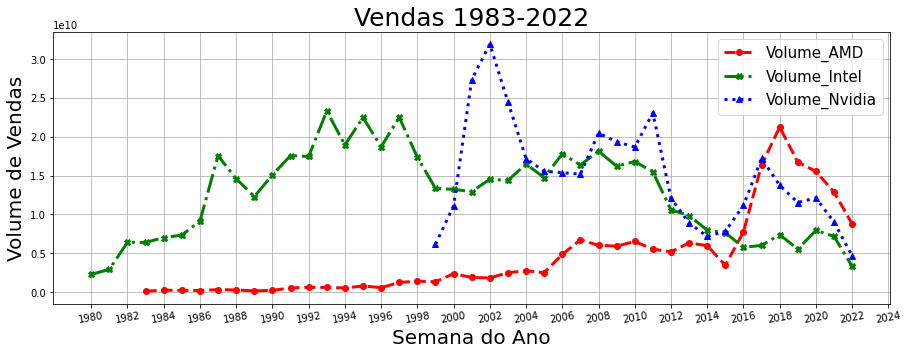

In [11]:
fig, ax = plt.subplots()
#ax = sns.scatterplot(data=df_volume) #, hue='surface_m2_type')

ax.figure.set_size_inches(15, 5)
ax.set_title('Vendas 1983-2022', fontsize=25)
ax.set_xlabel('Semana do Ano', fontsize=20)
ax.set_ylabel('Volume de Vendas', fontsize=20)

plt.grid(True)
plt.xticks(rotation=10)

plt.xticks(range(1980, 2026,2))   
plt.yticks(range(0,40000000000,5000000000))

line1, = ax.plot(df_volume['Volume_AMD'], label="Volume_AMD",color='red', marker='o',
                 linestyle='--', linewidth=3)
line2, = ax.plot(df_volume['Volume_Intel'], label="Volume_Intel",color='green', marker='X',
                 linestyle='-.', linewidth=3)
line3, = ax.plot(df_volume['Volume_Nvidia'], label="Volume_Nvidia",color='blue', marker='^',
                 linestyle=':', linewidth=3)

ax.legend(handles=[line1, line2, line3], loc='upper right', fontsize=15)

ax

#first_legend = ax.legend(handles=[line1], loc='upper right')

# Add the legend manually to the Axes.
#ax.add_artist(first_legend)

# Create another legend for the second line.
#ax.legend(handles=[line2], loc='lower right')


### Prévia AMD

In [68]:
videos_AMD['volume'].describe()

count    9.866000e+03
mean     1.811977e+07
std      2.700962e+07
min      3.200000e+03
25%      1.673600e+06
50%      7.734747e+06
75%      2.257455e+07
max      3.250584e+08
Name: volume, dtype: float64

In [69]:
videos_AMD.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

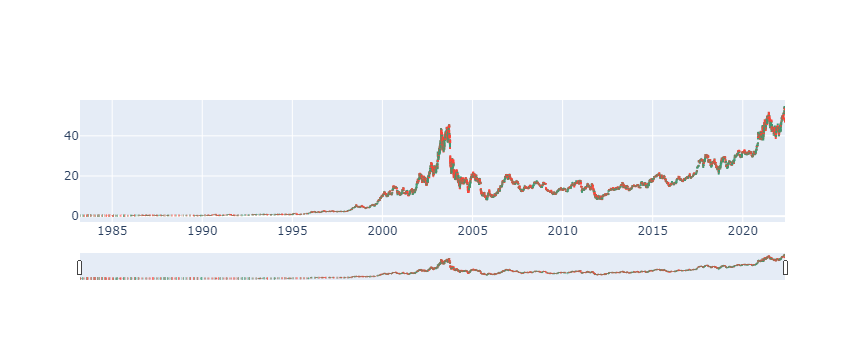

In [64]:
fig = go.Figure(data=go.Ohlc(x=videos_AMD['date'],
                    open=videos_Intel['open'],
                    high=videos_Intel['high'],
                    low=videos_Intel['low'],
                    close=videos_Intel['close'])
                    )
fig.show()

In [73]:
videos_AMD['date'] = pd.to_datetime(videos_AMD['date'])
videos_AMD_candle = videos_AMD.set_index('date')

videos_AMD_candle

,open,high,low,close,volume
date,,,,,
1983-03-21,8.9675,9.0300,8.8101,8.9975,510800
1983-03-22,8.7176,8.9675,8.4977,8.4977,328000
1983-03-23,8.4977,8.8101,8.4677,8.7176,427200
1983-03-24,8.7176,8.7801,8.6551,8.7801,393200
1983-03-25,8.9051,9.0600,8.7476,8.8726,210400
...,...,...,...,...,...
2022-05-02,85.6550,90.3700,85.3201,89.8400,97448446
2022-05-03,89.8500,92.2100,89.0100,91.1300,119221604
2022-05-04,98.1800,99.6900,91.7000,99.4200,224892814


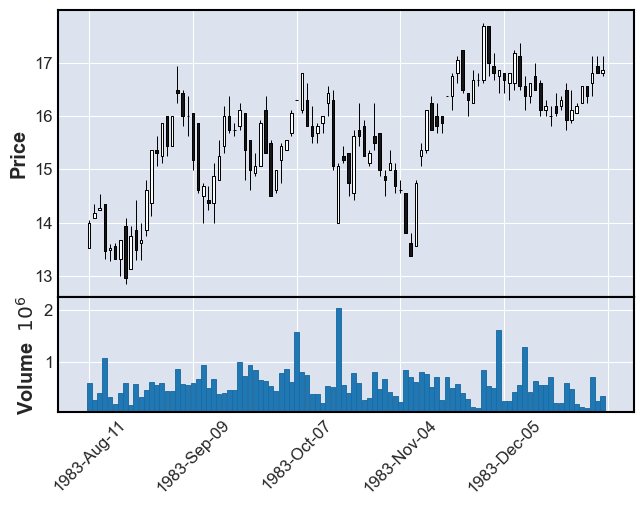

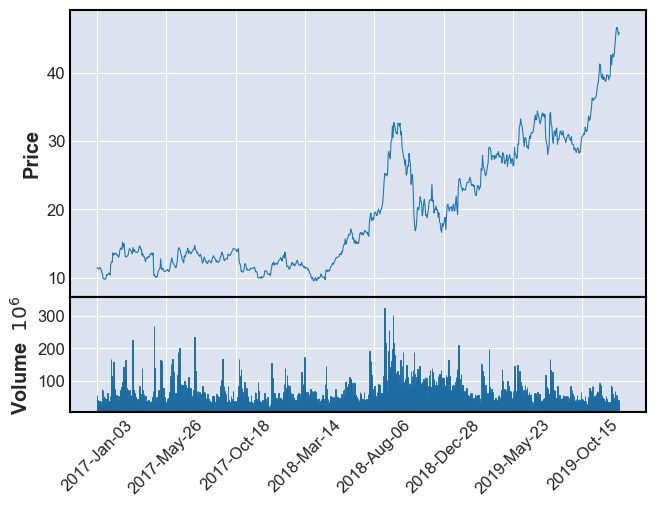

In [78]:
mpf.plot(videos_AMD_candle.iloc[100:200], type='candle', volume=True)

mpf.plot(videos_AMD_candle.loc["2017":"2019"], volume=True, type='line')

In [ ]:
# Teste de plot não utilizado.
"""
plt.figure(figsize = (15, 5))
plt.title('Vendas no Ano', fontsize=30)
plt.xlabel('Semana do Ano', fontsize=15)
plt.ylabel('Volume de Vendas', fontsize=15)
#plt.xlim(100)
plt.grid(True)
plt.text(10, 1.2e10, 'Abacaxi=100,\n=15')

sns.lineplot(data=videos_AMD_vol_sum)
sns.lineplot(data=videos_Intel_vol_sum)#.legend('Intel')
sns.lineplot(data=videos_Nvidia_vol_sum)#.legend('Nvidia')
"""

#plt.show()

### Agrupando os dados AMD

In [106]:
videos_AMD_vol_agg = videos_AMD_std.groupby('date').volume.agg(['count', 'mean', 'median', 'max', 'min', 'std'])

videos_AMD_vol_agg

,count,mean,median,max,min,std
date,,,,,,
1983,199,5.712578e+05,523600.0,2044000,3200,3.118013e+05
1984,253,9.232427e+05,833600.0,4924000,146800,5.738136e+05
1985,252,8.545913e+05,777500.0,2180000,196200,4.385924e+05
1986,253,7.643012e+05,650000.0,3106000,143000,4.409863e+05
1987,253,1.263331e+06,1047400.0,4700000,196200,8.302423e+05
1988,253,1.049426e+06,829800.0,4783200,223000,7.435483e+05
1989,252,5.821198e+05,456200.0,3442600,98400,4.449004e+05
1990,253,8.828680e+05,595000.0,4471000,84200,7.096086e+05
1991,253,2.078174e+06,1636400.0,20519000,288400,1.882123e+06


<AxesSubplot:xlabel='date', ylabel='volume'>

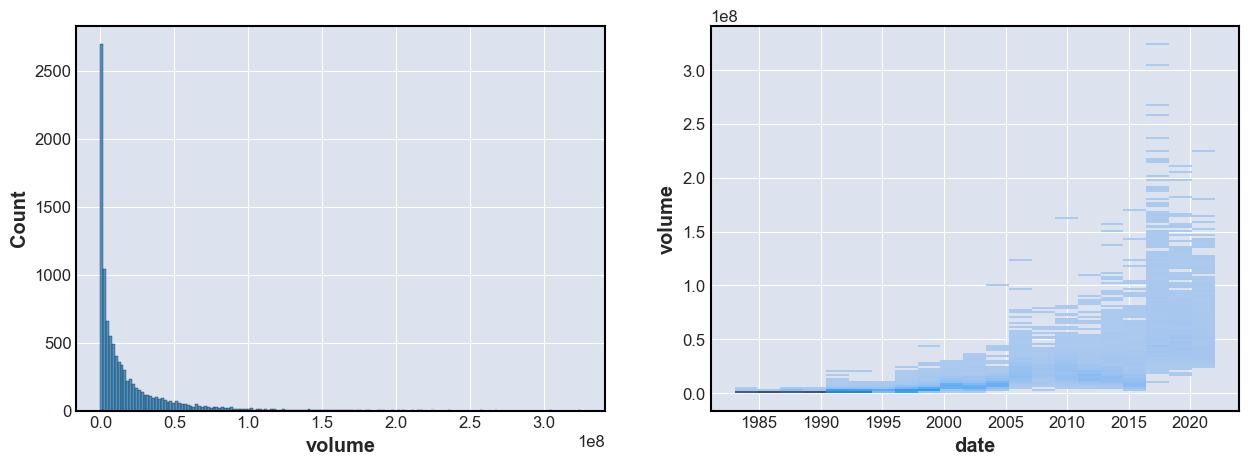

In [104]:
"""
ax = sns.histplot(data=videos_AMD_std, x='date', y='volume') 
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=75)
ax
"""
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = videos_AMD_std.volume)

sns.histplot(ax=axes[1], data = videos_AMD_std,  
             x = 'date',
             y = 'volume')

In [107]:
#volume_bins = [3.2e+03, 1.7e+06, 7.7e+06, 2.3e+07, 3.3e+08] 

volume_bins = [3.2e+03, 0.25e+08, 0.5e+08, 1.0e+08, 1.5e+08, 3.3e+08] 

group_labels = ['baixo', 'medio', 'alto', 'enorme', 'gigante']

videos_AMD_volume_categories = pd.cut(videos_AMD.volume, volume_bins, labels = group_labels)

videos_AMD_std['categories'] = videos_AMD_volume_categories

videos_AMD_std.head()

,date,open,high,low,close,volume,categories
0,1983,8.9675,9.0300,8.8101,8.9975,510800,baixo
1,1983,8.7176,8.9675,8.4977,8.4977,328000,baixo
2,1983,8.4977,8.8101,8.4677,8.7176,427200,baixo
3,1983,8.7176,8.7801,8.6551,8.7801,393200,baixo
4,1983,8.9051,9.0600,8.7476,8.8726,210400,baixo


<AxesSubplot:xlabel='categories', ylabel='Count'>

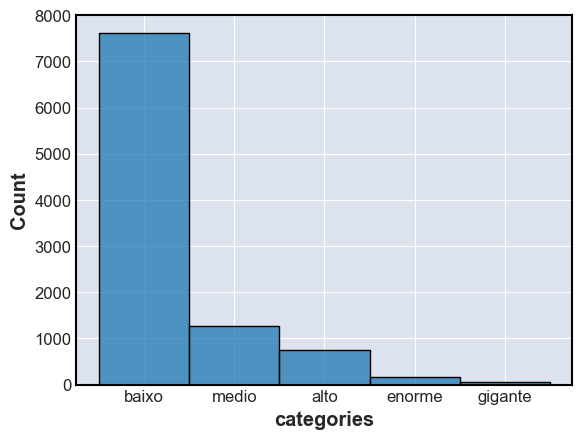

In [108]:
sns.histplot(data=videos_AMD_std,x='categories', bins='auto')